## Project: Investigate HealthCare Dataset.

### Table of Contents

  - Introduction
  - Variable Description
  - Data Wrangling
  - Exploratory Data Analysis
  - Conclusion

### Introduction

In this project, I will be analyzing the HealthCare dataset. The dataset has 18,128 rows and 11 columns.

### Variable Description
 
 We need to know the dataset variables before analyzing as this gives us a clear understanding of our data.
 
 - id: unique identity for each customer.
 - gender: customer gender whether male,female or other.
 - age: customers age from 1 to 82.
 - hypertension: if the customer suffers from hypertension(yes) or not(no).
 - heart_disease: if the customer has heart disease or not.
 - ever_married: customer's marital status whether yes or no.
 - work_type: customers work type which could be private, self-employed, children, govt-job or never_worked.
 - residence_type: customers residence type whether urban or rural.
 - avg_glucose_level: glucose level ranging from 55.0 to 275.72.
 - bmi: Body Mass Index ranging from 10.2 to 88.3.
 - smoking_status: if customer has formerly_smoked, smokes, never_smoked or NaN.

### Data Understanding

Now that we have understood the dataset variables, we need to import the data and load into a dataframe. 

In [68]:
#import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
#Load dataset into a dataframe hc
hc = pd.read_excel(r"C:\Users\Administrator\Desktop\Datatechcon\final projects ML\Healthcare Data.xlsx")


### Data Validation

In [70]:
#first 5 rows of the data
hc.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80,No,No,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74,No,Yes,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14,No,No,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28,No,No,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63,No,No,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [71]:
hc.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
18123,67353,Male,20,No,No,No,Private,Rural,74.43,18.4,formerly smoked
18124,362,Male,61,No,No,Yes,Govt_job,Rural,211.55,31.6,smokes
18125,29839,Female,79,No,No,Yes,Private,Rural,125.74,29.4,never smoked
18126,6438,Male,55,No,No,Yes,Govt_job,Rural,69.46,33.8,never smoked
18127,16770,Female,38,No,No,No,Private,Rural,91.23,24.4,NaN


In [72]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18128 entries, 0 to 18127
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18128 non-null  int64  
 1   gender             18128 non-null  object 
 2   age                18128 non-null  int64  
 3   hypertension       18128 non-null  object 
 4   heart_disease      18128 non-null  object 
 5   ever_married       18128 non-null  object 
 6   work_type          18128 non-null  object 
 7   Residence_type     18128 non-null  object 
 8   avg_glucose_level  18128 non-null  float64
 9   bmi                17547 non-null  float64
 10  smoking_status     12850 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ MB


In [73]:
hc.shape

(18128, 11)

- There are 18,128 rows with 11 columns in this dataset.
- There are missing values in columns bmi and smoking_status which will either be dropped or replaced.
- All columns have correct datatypes
- Column names will be standardized
- columns age, bmi and avg_glucose_level will be categorized into groups.

In [74]:
# checking the tottal number of missing values in each column
print(hc.isnull().sum())

percentage_missing = hc.isnull().sum()/len(hc) * 100
print(percentage_missing)

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   581
smoking_status       5278
dtype: int64
id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.204987
smoking_status       29.115181
dtype: float64


There are 581 (3%) missing values in the bmi column and 5278 (29%) missing values in smoking status column. Missing values in the bmi column will be filled in using the pad method and missing values in smoking_status will be replace with None.

In [75]:
hc['smoking_status']= hc['smoking_status'].fillna('None', inplace=False)
hc['smoking_status']

0        formerly smoked
1        formerly smoked
2                   None
3                   None
4           never smoked
              ...       
18123    formerly smoked
18124             smokes
18125       never smoked
18126       never smoked
18127               None
Name: smoking_status, Length: 18128, dtype: object

In [76]:
hc['bmi']= hc['bmi'].fillna(method= 'pad', inplace = False)
hc['bmi']

0        21.1
1        26.0
2        21.2
3        23.4
4        27.6
         ... 
18123    18.4
18124    31.6
18125    29.4
18126    33.8
18127    24.4
Name: bmi, Length: 18128, dtype: float64

In [77]:
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18128 entries, 0 to 18127
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 18128 non-null  int64  
 1   gender             18128 non-null  object 
 2   age                18128 non-null  int64  
 3   hypertension       18128 non-null  object 
 4   heart_disease      18128 non-null  object 
 5   ever_married       18128 non-null  object 
 6   work_type          18128 non-null  object 
 7   Residence_type     18128 non-null  object 
 8   avg_glucose_level  18128 non-null  float64
 9   bmi                18128 non-null  float64
 10  smoking_status     18128 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.5+ MB


- All missing values have now been treated and all columns have 18,128 observations each.

In [78]:
hc.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [79]:
lowercolumn = []
for i in range(len(hc.columns)):
    lowercolumn.append(hc.columns[i].replace('_', ' ').lower())
hc.columns = lowercolumn
hc.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart disease', 'ever married',
       'work type', 'residence type', 'avg glucose level', 'bmi',
       'smoking status'],
      dtype='object')

- Column names have now been standardized by changing to lower letters

In [80]:
hc.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18123    False
18124    False
18125    False
18126    False
18127    False
Length: 18128, dtype: bool

- There are no duplicated in the dataset.

In [81]:
# number of unique values in each column
hc.nunique()

id                   18128
gender                   3
age                     82
hypertension             2
heart disease            2
ever married             2
work type                5
residence type           2
avg glucose level     8670
bmi                    494
smoking status           4
dtype: int64

In [82]:
hc['residence type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [83]:
hc['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [84]:
hc['work type'].unique()

array(['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'],
      dtype=object)

In [85]:
hc['ever married'].unique()

array(['Yes', 'No'], dtype=object)

In [86]:
hc['hypertension'].unique()

array(['No', 'Yes'], dtype=object)

In [87]:
hc['heart disease'].unique()

array(['No', 'Yes'], dtype=object)

- 

In [88]:
# summary statistics 
hc.describe()

,id,age,avg glucose level,bmi
count,18128.000000,18128.000000,18128.000000,18128.000000
mean,36713.370311,43.126765,104.693037,28.823979
std,21054.851467,21.810516,42.946279,7.636439
min,2.000000,1.000000,55.000000,10.200000
25%,18486.250000,25.000000,77.560000,23.600000
50%,36675.500000,44.000000,92.000000,27.900000
75%,55079.250000,60.000000,112.582500,32.900000
max,72942.000000,82.000000,275.720000,88.300000


- Youngest patient is 1 year and Oldest is 82 years
- The average bmi and glucose level of a patient is 43.12 and 104.69 repectively. 

In [89]:
#creating age bins for 
bins = [0,20,40,60,100]
labels = ['below 20', '21-40', '41-60','60+']

hc['age group'] = pd.cut(hc['age'],bins,labels=labels)
hc['age group']

0             60+
1             60+
2        below 20
3           21-40
4             60+
           ...   
18123    below 20
18124         60+
18125         60+
18126       41-60
18127       21-40
Name: age group, Length: 18128, dtype: category
Categories (4, object): ['below 20' < '21-40' < '41-60' < '60+']

In [90]:
#creating bmi bins for 
bins = [0,18.5,24.9,29.9,90]
labels = ['Underweight', 'Healthy Weight', 'Overweight','Obesity']

hc['bmi group'] = pd.cut(hc['bmi'],bins,labels=labels)
hc['bmi group']

0        Healthy Weight
1            Overweight
2        Healthy Weight
3        Healthy Weight
4            Overweight
              ...      
18123       Underweight
18124           Obesity
18125        Overweight
18126           Obesity
18127    Healthy Weight
Name: bmi group, Length: 18128, dtype: category
Categories (4, object): ['Underweight' < 'Healthy Weight' < 'Overweight' < 'Obesity']

In [91]:
#creating glucose level bins 
bins = [0,140,199,280]
labels = ['Normal', 'Prediabetes', 'Diabetes']

hc['avg glucose level group'] = pd.cut(hc['avg glucose level'],bins,labels=labels)
hc['avg glucose level group']

0             Normal
1        Prediabetes
2             Normal
3             Normal
4             Normal
            ...     
18123         Normal
18124       Diabetes
18125         Normal
18126         Normal
18127         Normal
Name: avg glucose level group, Length: 18128, dtype: category
Categories (3, object): ['Normal' < 'Prediabetes' < 'Diabetes']

In [92]:
hc.head()

,id,gender,age,hypertension,heart disease,ever married,work type,residence type,avg glucose level,bmi,smoking status,age group,bmi group,avg glucose level group
0,36306,Male,80,No,No,Yes,Private,Urban,83.84,21.1,formerly smoked,60+,Healthy Weight,Normal
1,61829,Female,74,No,Yes,Yes,Self-employed,Rural,179.50,26.0,formerly smoked,60+,Overweight,Prediabetes
2,14152,Female,14,No,No,No,children,Rural,95.16,21.2,None,below 20,Healthy Weight,Normal
3,12997,Male,28,No,No,No,Private,Urban,94.76,23.4,None,21-40,Healthy Weight,Normal
4,40801,Female,63,No,No,Yes,Govt_job,Rural,83.57,27.6,never smoked,60+,Overweight,Normal


In [93]:
# relationship among columns
hc.corr()

,id,age,avg glucose level,bmi
id,1.000000,0.007301,0.021383,0.001641
age,0.007301,1.000000,0.231215,0.312300
avg glucose level,0.021383,0.231215,1.000000,0.182082
bmi,0.001641,0.312300,0.182082,1.000000


- There is a slight positive correlation between patient's age and bmi value.
- There is slight positive correlation between patient's age and glucose level.

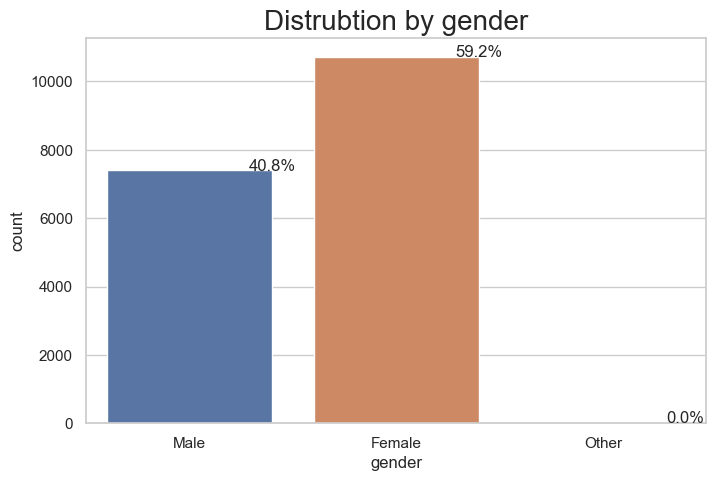

In [94]:
#bar chart using categorical variable to show patients population by gender
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="gender", data=hc)
plt.title('Distrubtion by gender', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 59.2% of the population are females while 40.8% are males

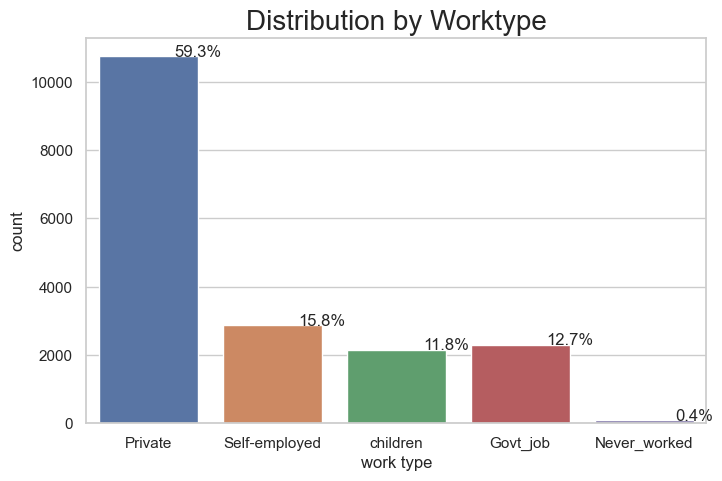

In [95]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="work type", data=hc)
plt.title('Distribution by Worktype', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 59.3% of the patients work in a private company
- 15.8% are self-employed
- 12.7% work for the government
- 11.8% are children and 
- 0.4% have never worked

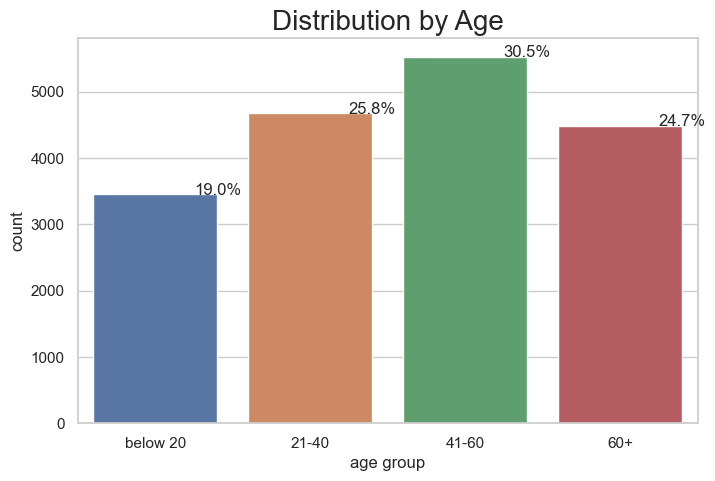

In [96]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="age group", data=hc)
plt.title('Distribution by Age', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- age group 41-60 form the largest part of patients population with 30.5%, followed by 21-40 with 25.8%.
- patients below 20 and above 60 are 18.9% and 24.7% respectively.

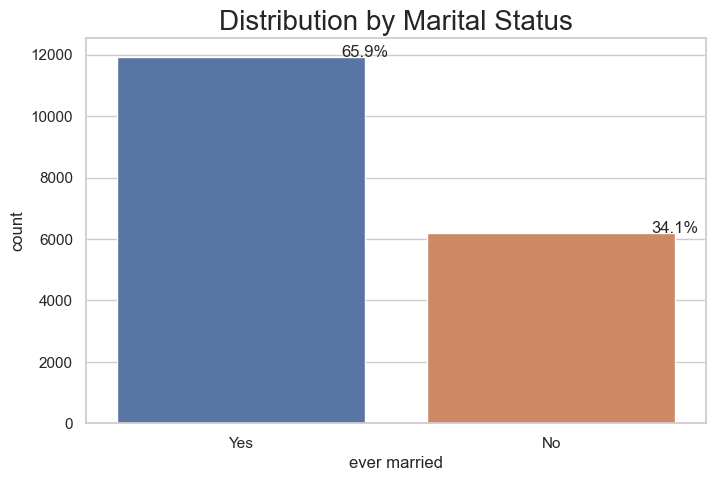

In [97]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="ever married", data=hc)
plt.title('Distribution by Marital Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 65.9% of the poulation are married.

Text(0.5, 1.0, 'Where do our patients live?')

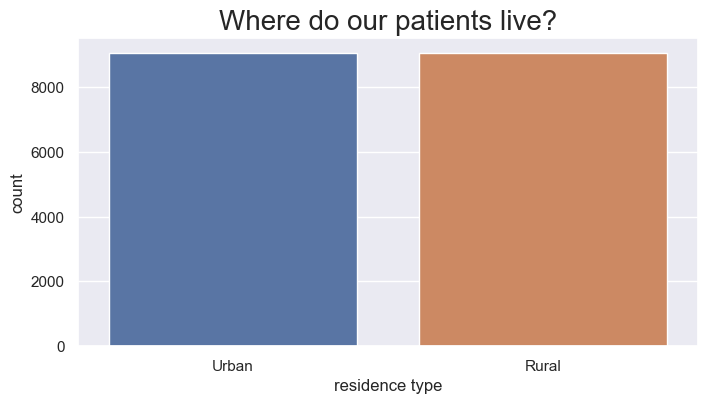

In [98]:
#bar chart using categorical variable to show pop by residence type
sns.set(style='darkgrid')
plt.figure(figsize=(8,4))
ax = sns.countplot(x='residence type', data=hc)
plt.title('Where do our patients live?', fontsize=20)


- There is an equal distribution in the patients residence type i.e 50% live in the rural area and 50% live in the urban area.

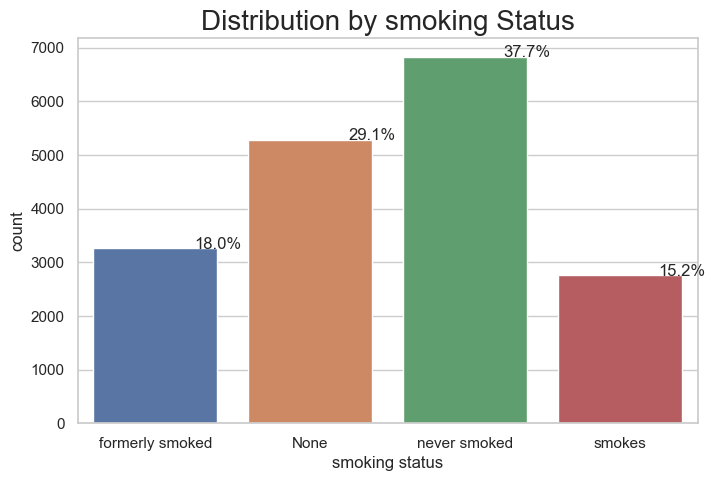

In [99]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="smoking status", data=hc)
plt.title('Distribution by smoking Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 37.7% never smoked
- 18.0% used to smoke
- 15.2% still smoke

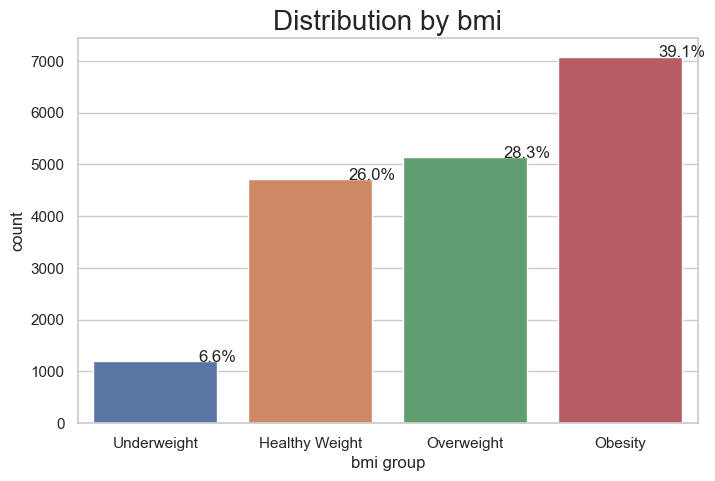

In [100]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="bmi group", data=hc)
plt.title('Distribution by bmi', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 39.1% of the patients are obese
- 28.3% are overweight
- 26.0% have a healthy weight
- 6.6% are underweight

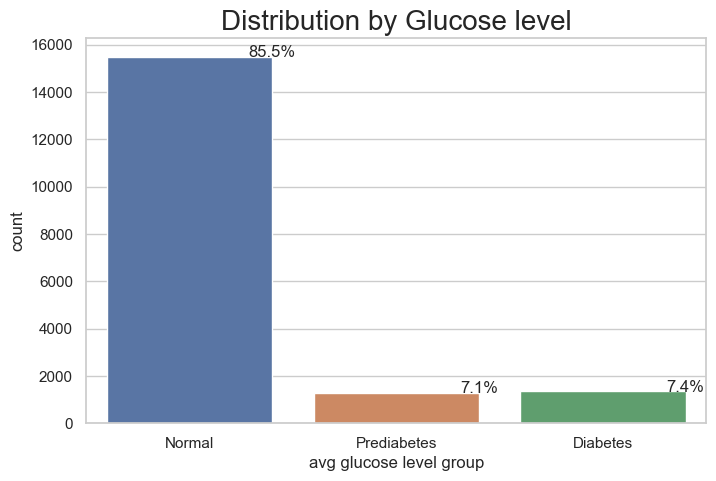

In [101]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="avg glucose level group", data=hc)
plt.title('Distribution by Glucose level', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 85.5% have normal glucose level
- 7.1% are prediabetic
- 7.4% are diabetic

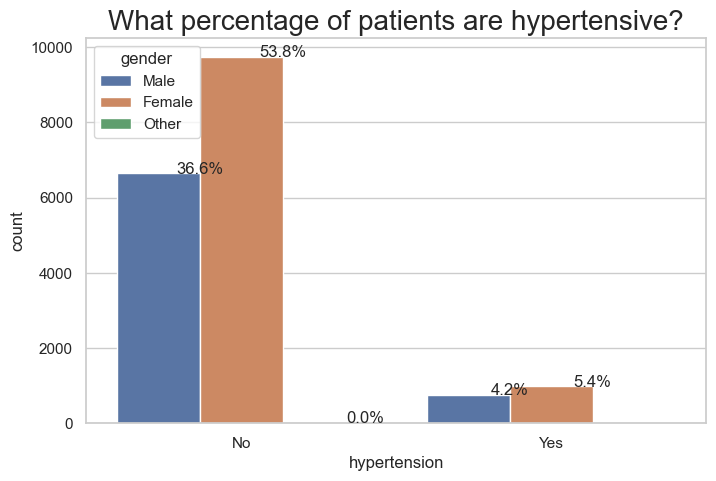

In [102]:
#bar chart using categorical variable to show population by hypertension

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="hypertension", hue='gender', data=hc)
plt.title('What percentage of patients are hypertensive?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 9.6% of the patients are hypertensive with the higher % being females

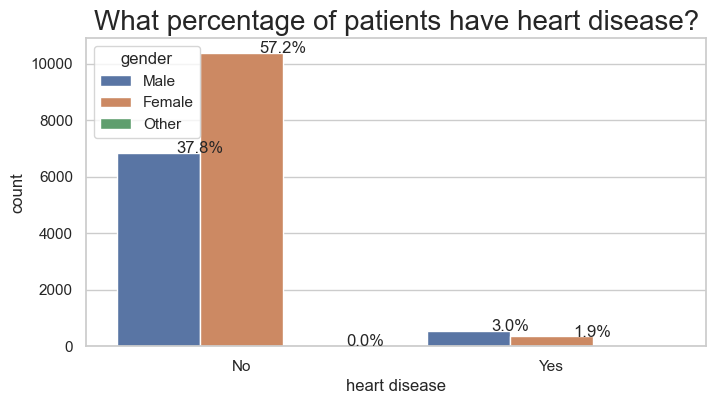

In [103]:
#bar chart using categorical variable to show population by heart diesease

sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='gender', data=hc)
plt.title('What percentage of patients have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 4.9% of the patients have heart disease with 3.0% being males 

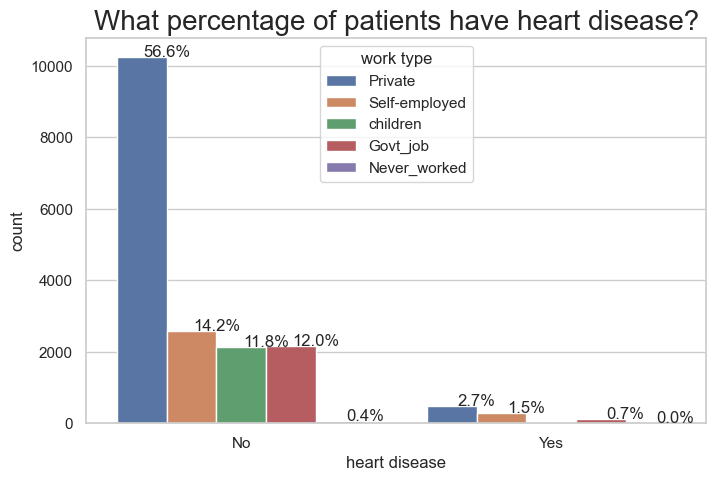

In [104]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='work type', data=hc)
plt.title('What percentage of patients have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- of 4.9% that have heart disease, the patients who work in private companies have the the highest rate followed by those self-employed.
- children and those who have never worked have no heart disease.

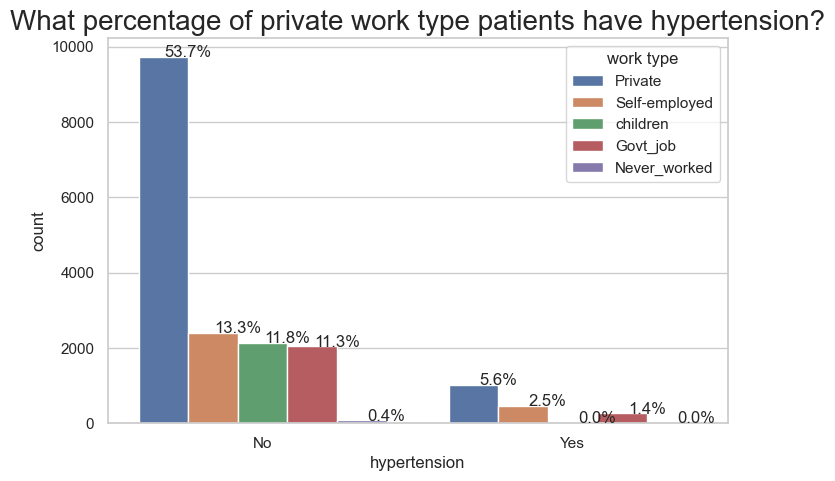

In [105]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="hypertension", hue='work type', data=hc)
plt.title('What percentage of private work type patients have hypertension?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- of 9.8% who are hypertensive, the private work type patients rank the highest followed by self-employed patients.
- children and those who never worked do not suffer from hypertension.

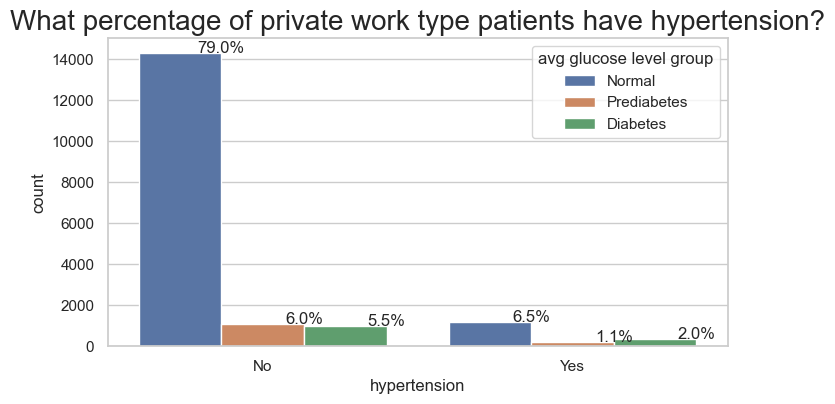

In [106]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
total = float(len(hc))
ax = sns.countplot(x="hypertension", hue='avg glucose level group', data=hc)
plt.title('What percentage of private work type patients have hypertension?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- of 9.6% that are hypertensive, the normal glucose level group constitute the highest with 6.5%.

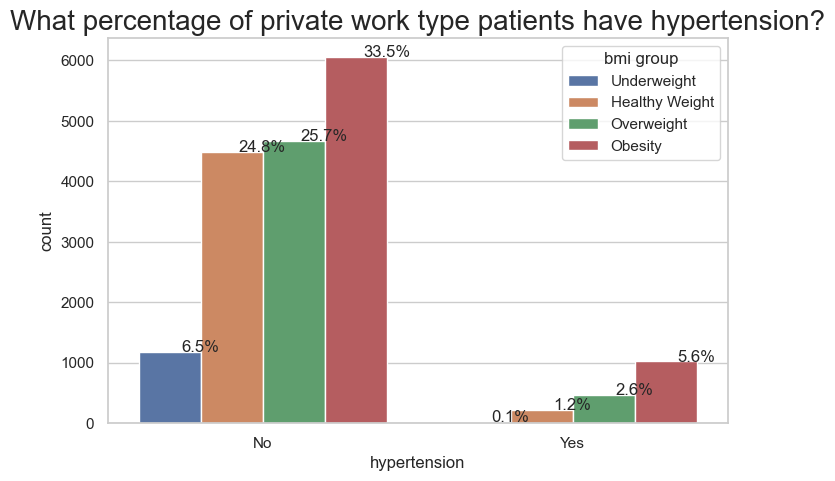

In [107]:
#bar chart using categorical variable to show population by worktype

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="hypertension", hue='bmi group', data=hc)
plt.title('What percentage of private work type patients have hypertension?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Of 9.6% that are hypertensive, patients who are obese constitute the highest with 5.6%
- patients who are overweight(2.6%) are also at a risk of hypertension.

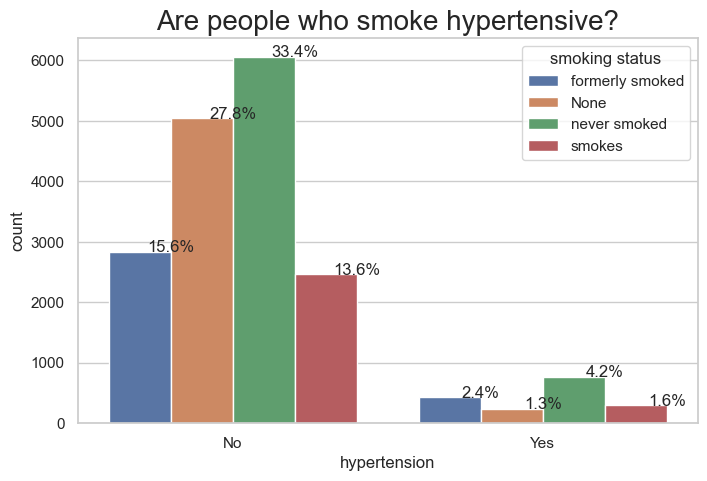

In [108]:

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="hypertension", hue='smoking status', data=hc)
plt.title('Are people who smoke hypertensive?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- of the patients that are hypertensive, 4.2% have never smoked, 2.4% have formerly smoked, and 1.6% smoke.
- people who smoke or have history of smoking are hypertensive and this might be an influencing factor. 

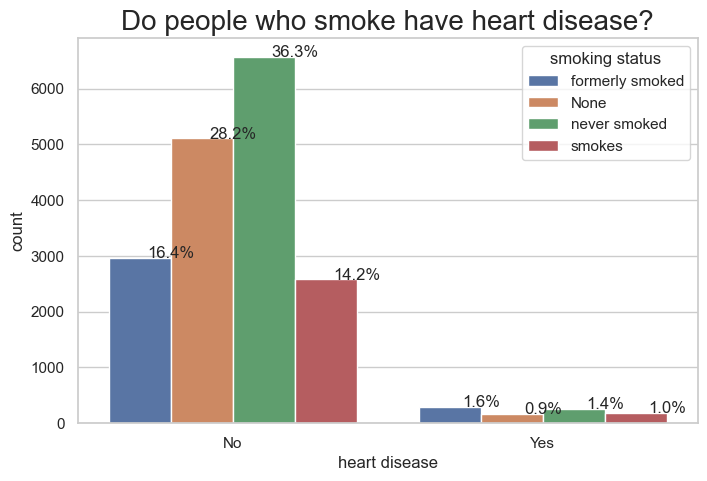

In [109]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='smoking status', data=hc)
plt.title('Do people who smoke have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Yes, patients who smoke or have a history of smoking have heart disease as compared to the percentage that never smoked and therefore can be a major risk factor for heart disease.

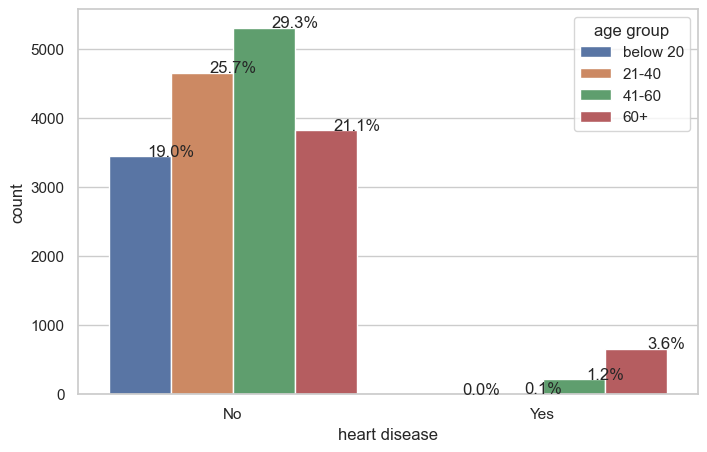

In [110]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='age group', data=hc)
# plt.title('Do people who smoke have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Of 4.9% that have heart disease, age group 60+ is 3.6% and group 41-60 with 1.2%

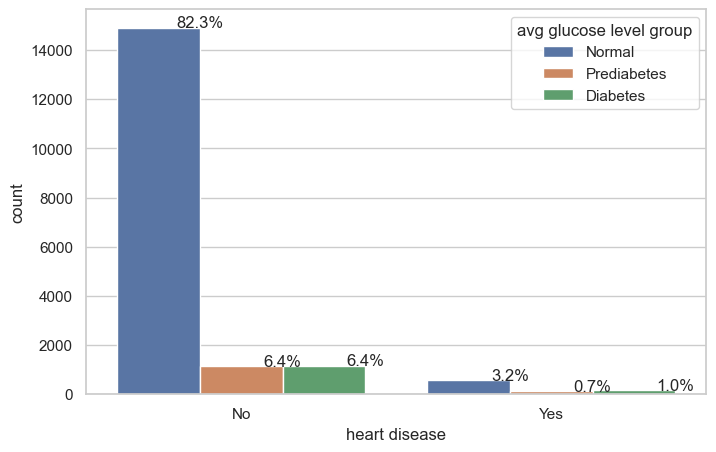

In [111]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='avg glucose level group', data=hc)
# plt.title('Do people who smoke have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Of 4.9% that have heart disease, Normal glucose level is 3.2%, diabetes is 1.0% and diabetes is 0.7%

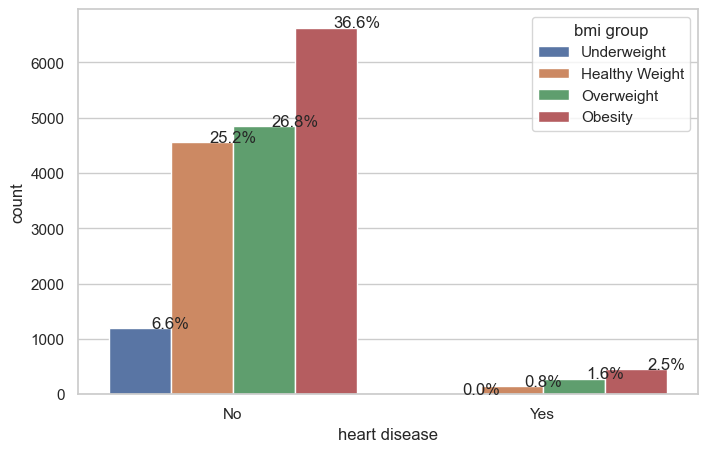

In [112]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='bmi group', data=hc)
# plt.title('Do people who smoke have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Of 4.9% that have heart disease, obesity is 2.5%, overweight is 1.6%,and healthy weight is 0.8%.

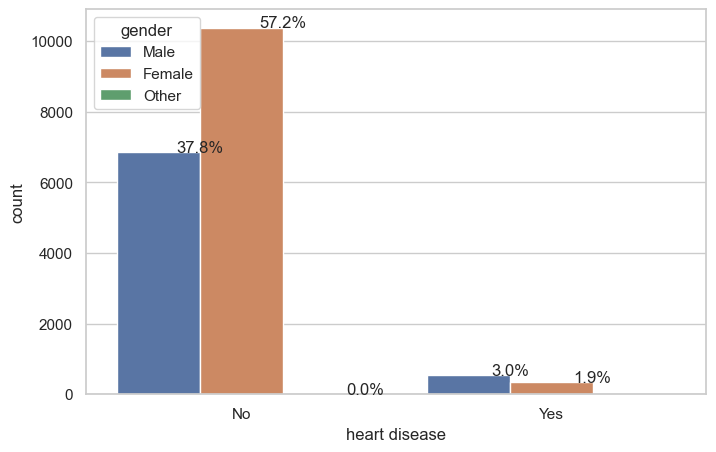

In [113]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='gender', data=hc)
# plt.title('Do people who smoke have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Of 4.9% that have heart disease, males are 3.0% and females are 1.9%.

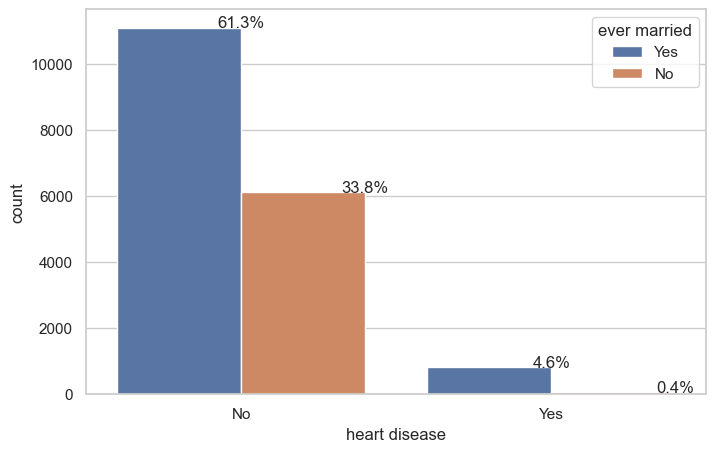

In [114]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='ever married', data=hc)
# plt.title('Do people who smoke have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Of 4.9% that have heart disease, married patients are 4.6% and unmarried are 0.4%.

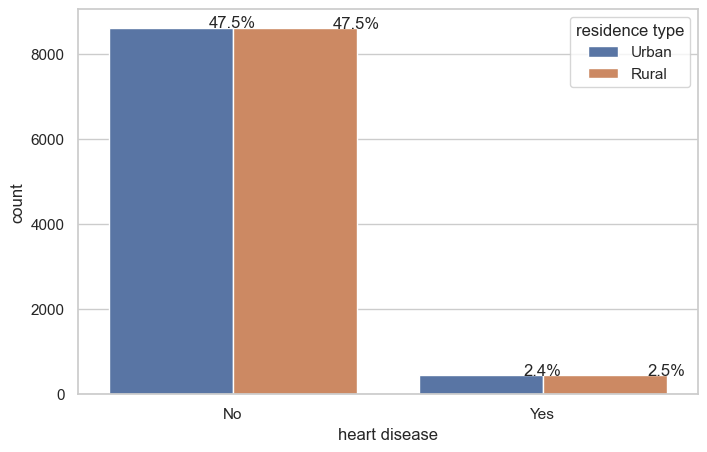

In [115]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='residence type', data=hc)
# plt.title('Do people who smoke have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Of 4.9% that have heart disease, urban resident are 2.4% and rural residents are 2.5%.

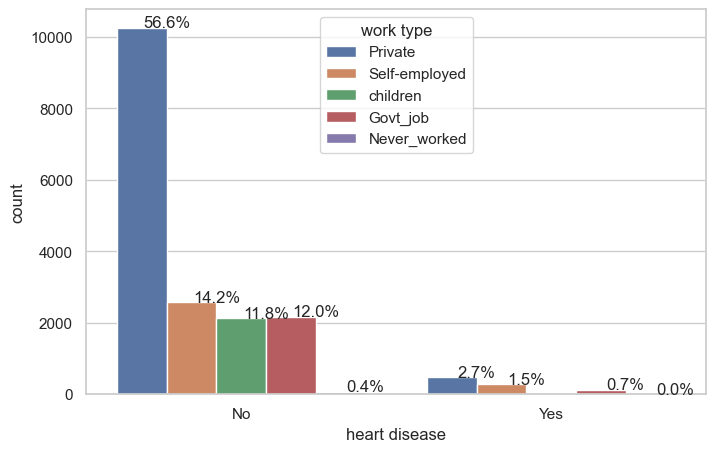

In [116]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='work type', data=hc)
# plt.title('Do people who smoke have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Of 4.9% that have heart disease, private workers are 2.7%, self employed are 1.5%, government workers are 0.7%.
- children and those who never worked have no heart disease.

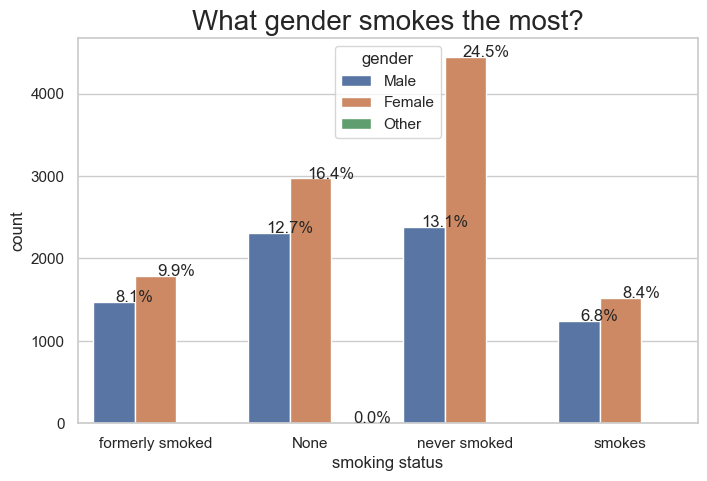

In [117]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="smoking status", hue='gender', data=hc)
plt.title('What gender smokes the most?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- of the 15.2% that smoke, females have 8.4% and males have 6.8%, therefore female gender smokes the most.

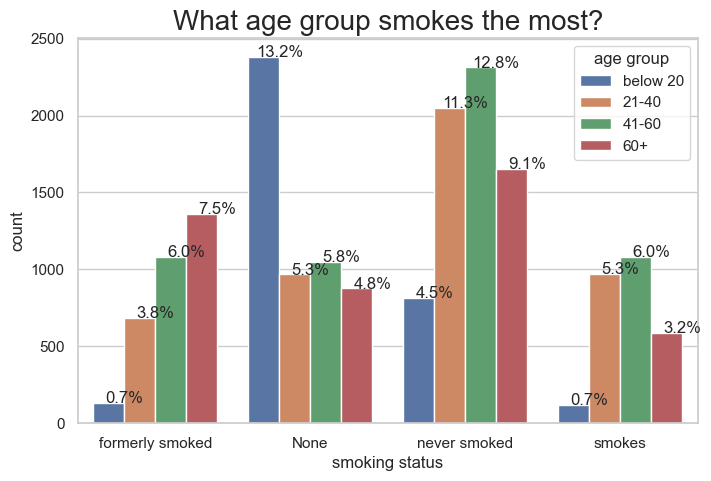

In [118]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="smoking status", hue='age group', data=hc)
plt.title('What age group smokes the most?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- age groups 41-60 and 21-40 rank the highest in the category of patients who smoke.
- age group 1-20 ranked the least in this category.

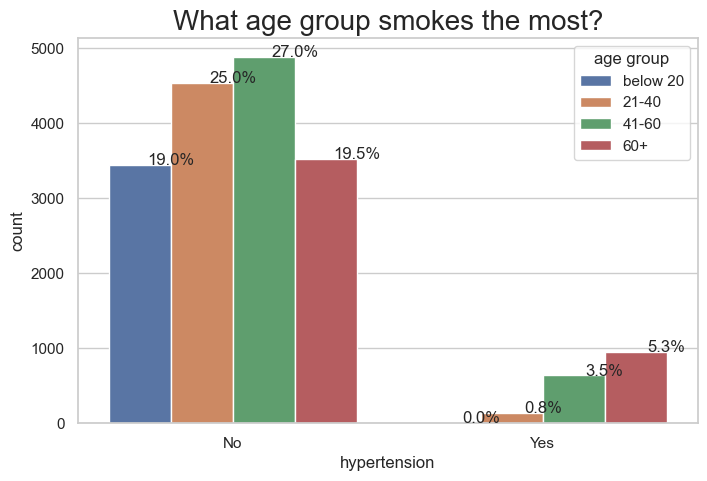

In [119]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="hypertension", hue='age group', data=hc)
plt.title('What age group smokes the most?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- age groups 60+ and 41-60 suffer the most from hypertension while age group 1-20 have no data.


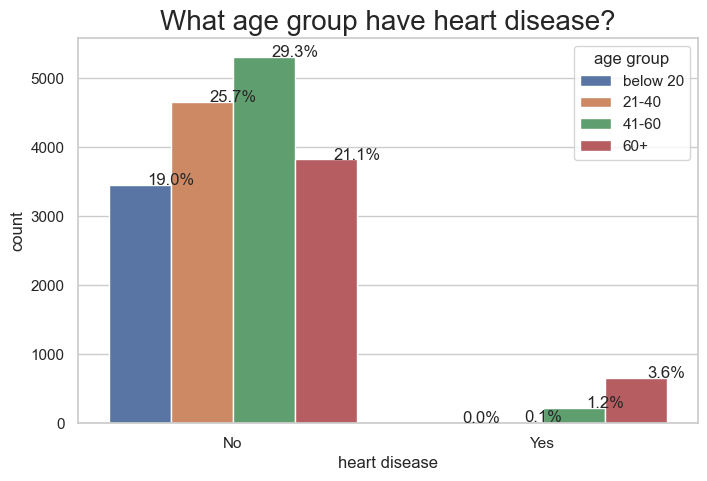

In [120]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(hc))
ax = sns.countplot(x="heart disease", hue='age group', data=hc)
plt.title('What age group have heart disease?', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- age groups 60+ and 41-60 have heart disease with 60+ ranking higher.

### Outlier Analysis

<AxesSubplot:xlabel='age'>

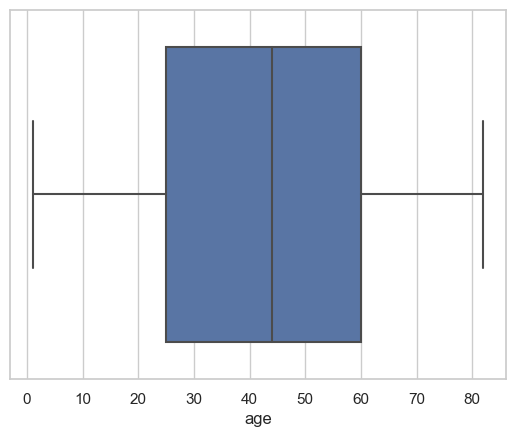

In [121]:
#let's check if outlier exist using the age field
sns.boxplot(x=hc['age'])

- No outliers in the age column.

<AxesSubplot:xlabel='bmi'>

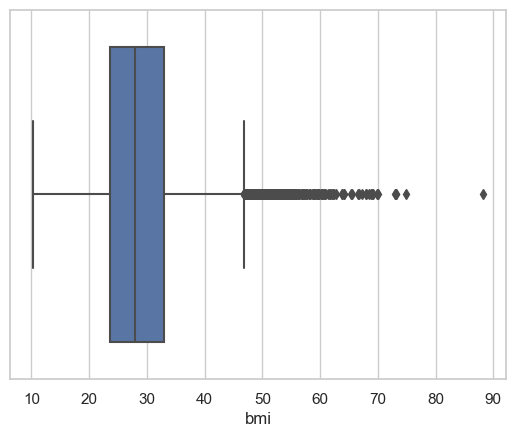

In [122]:
#let's check if outlier exist using the bmi field
sns.boxplot(x=hc['bmi'])

- outliers exist in the bmi column. Values are from 47 to 90

In [125]:
Q1_bmi = hc['bmi'].quantile(0.25)
Q3_bmi = hc['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
print(IQR_bmi)

9.299999999999997


In [126]:
hc[(hc['bmi']< Q1_bmi-1.5* IQR_bmi) | (hc['bmi']> Q3_bmi+1.5* IQR_bmi)]

,id,gender,age,hypertension,heart disease,ever married,work type,residence type,avg glucose level,bmi,smoking status,age group,bmi group,avg glucose level group
202,65733,Female,69,Yes,Yes,Yes,Private,Urban,70.04,53.7,never smoked,60+,Obesity,Normal
206,35411,Male,66,No,No,Yes,Govt_job,Rural,111.77,48.7,never smoked,60+,Obesity,Normal
243,57408,Female,55,No,No,Yes,Self-employed,Rural,94.99,50.5,smokes,41-60,Obesity,Normal
327,50245,Male,19,Yes,No,No,Private,Urban,167.75,54.5,None,below 20,Obesity,Prediabetes
332,60913,Female,39,No,No,Yes,Private,Urban,209.35,55.6,formerly smoked,21-40,Obesity,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17954,21681,Male,46,No,No,No,Govt_job,Rural,108.65,60.1,never smoked,41-60,Obesity,Normal
17968,19505,Female,33,Yes,No,Yes,Private,Urban,101.57,57.8,formerly smoked,21-40,Obesity,Normal
17974,39602,Male,40,Yes,No,Yes,Private,Urban,245.37,50.4,never smoked,21-40,Obesity,Diabetes
18065,13526,Male,69,No,No,Yes,Self-employed,Rural,85.64,51.9,None,60+,Obesity,Normal


<AxesSubplot:xlabel='avg glucose level'>

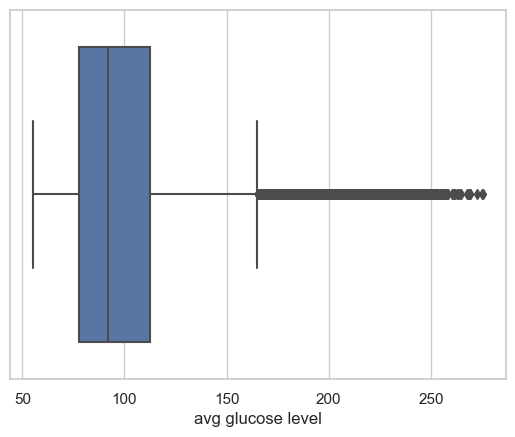

In [64]:
#let's check if outlier exist using the spent field
sns.boxplot(x=hc['avg glucose level'])

- outliers exist in the glucose level column and values are from 160 to 300

In [65]:
Q1 = hc['avg glucose level'].quantile(0.25)
Q3 = hc['avg glucose level'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

35.022499999999994


In [66]:
hc[(hc['avg glucose level']< Q1-1.5* IQR) | (hc['avg glucose level']> Q3+1.5* IQR)]

,id,gender,age,hypertension,heart disease,ever married,work type,residence type,avg glucose level,bmi,smoking status,age group,bmi group,avg glucose level group
1,61829,Female,74,No,Yes,Yes,Self-employed,Rural,179.50,26.0,formerly smoked,60+,Overweight,Prediabetes
5,9348,Female,66,Yes,No,Yes,Private,Urban,219.98,32.2,never smoked,60+,Obesity,Diabetes
14,33104,Female,67,No,No,Yes,Govt_job,Urban,236.60,24.2,never smoked,60+,Healthy Weight,Diabetes
19,47721,Female,37,No,No,Yes,Govt_job,Urban,165.44,36.1,formerly smoked,21-40,Obesity,Prediabetes
24,67576,Female,82,No,No,Yes,Private,Rural,205.80,36.5,formerly smoked,60+,Obesity,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18044,4906,Male,48,Yes,No,Yes,Private,Rural,233.91,32.5,smokes,41-60,Obesity,Diabetes
18087,15153,Male,49,No,Yes,Yes,Self-employed,Rural,220.70,31.7,smokes,41-60,Obesity,Diabetes
18113,69190,Male,25,No,No,No,Private,Rural,178.14,27.8,never smoked,21-40,Overweight,Prediabetes
18115,36976,Female,82,Yes,No,Yes,Private,Urban,180.24,40.4,formerly smoked,60+,Obesity,Prediabetes


In [57]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [58]:
HealthCare_Data = pd.ExcelWriter('Healthcare_data.xlsx')

In [59]:
hc.to_excel(HealthCare_Data)

In [60]:
HealthCare_Data.save()